In [1]:
import numpy as np
import math
from math import exp
import numpy.linalg as linalg
from sklearn import metrics
import random
from sklearn.datasets import fetch_mldata
import cvxopt
from cvxopt import solvers
from cvxopt.base import matrix as mat
from pylab import *
%matplotlib inline

In [2]:
def data(size,features,deviation):
    w = np.array([0.6,0.6])
    w0 = np.array([0])
    n = size/2
    #Normalized distributed data:
    X = np.append((np.random.randn(n,features)+deviation),(np.random.randn(n,features)-deviation),axis =0)
    #print X
    Y = []
    for i in range(len(X)):
        if (w0 + np.dot(w,X[i])) > 0:
            Y.append([1.0])
        elif (w0 + np.dot(w,X[i])) < 0:
            Y.append([-1.0])
    #print Y
    Y = np.array(Y)
    #lists used to plot the data
    X_pos = []
    X_neg = []
    x_neg = []
    y_neg = []
    x_pos = []
    y_pos = []
    #separating based on features.
    for i in range(len(Y)):
        if Y[i] == 1:
            X_pos.append(X[i])
            #print X[i]
        elif Y[i] == -1:
            X_neg.append(X[i])
    #print X_pos
    #print X_neg
    
    for j in range(len(X_pos)):
        x_pos.append(X_pos[j][0])
        y_pos.append(X_pos[j][1])
    #print x_pos
    #print y_pos

    for j in range(len(X_neg)):
        x_neg.append(X_neg[j][0])
        y_neg.append(X_neg[j][1])
        
    
    plt.plot(x_neg,y_neg,'ro')
    plt.plot(x_pos,y_pos,'bo')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return X,Y

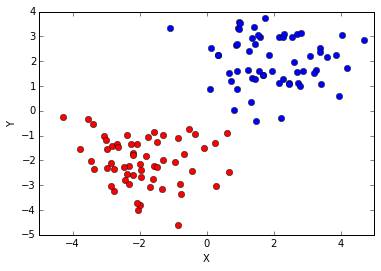

In [3]:
#linearly separable data
X_lin,Y_lin = data(120,2,2.0)

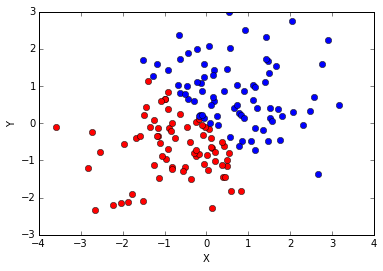

In [4]:
#linearly non separable data
X_non,Y_non = data(150,2,0.5)

In [5]:
def soft(x,y):
    poly_kernal = []
    for a in range(len(x)):
        list1 = []
        for b in range(len(x)):
            list1.append((np.dot(x[a],x[b])+1)**1)
        poly_kernal.append(list1)
    poly_kernal = np.array(poly_kernal)
    W = 0
    W0 = 0
    var = x.shape[0]
    epsilon = 0
    c = 1.0
    p = cvxopt.base.matrix(np.ndarray.tolist(np.dot(y,y.T) * poly_kernal))
    q = cvxopt.base.matrix([-1.0] * var)
    gtemp1 = np.zeros((var, var), float)
    gtemp2 = np.zeros((var, var), float)
    np.fill_diagonal(gtemp1, -1.0)
    np.fill_diagonal(gtemp2, 1.0)
    g = cvxopt.base.matrix(np.ndarray.tolist(np.append(gtemp1,gtemp2,axis=0).T))
    print g.size
    h = cvxopt.base.matrix(([0.0] * var + [c] * var))
    a = cvxopt.base.matrix(np.ndarray.tolist(y))
    b = cvxopt.base.matrix([1.0])
    ld = solvers.qp(p,q,g,h,a,b) #dual problem minimization
    alpha_val = cvxopt.base.matrix(ld['x'])
    support_vector = []
    for i in range(len(alpha_val)):
        if alpha_val[i] > epsilon and alpha_val[i] < c :
            support_vector.append(x[i])
    support_vector = np.matrix(support_vector)
    for j in range(len(alpha_val)):
        W = W + (alpha_val[j] * y[j] * x[j])
    for k in range((len(y))):
        W0 = W0 + (y[k] - np.dot(W,x[k]))
    W0 = W0 / len(support_vector)
    
    return W, W0, support_vector
    

In [6]:
def predict(x,w,w0):
    predict = []
    for i in range(len(x)):
        var1 = np.dot(w,x[i]) + w0
        if var1 > 0:
            predict.append([1])
        if var1 < 0:
            predict.append([-1])
    return np.array(predict)        

In [7]:
def accuracy(labels,predicted):
    return metrics.accuracy_score(labels, predicted)

In [8]:
W_lin, W0_lin, sv_lin = soft(X_lin,Y_lin)

(240, 120)
     pcost       dcost       gap    pres   dres
 0: -1.2763e+01 -2.0652e+02  1e+03  2e+00  7e-15
 1: -7.3712e+00 -1.0044e+02  2e+02  2e-01  5e-15
 2: -2.9802e+00 -1.4900e+01  2e+01  3e-02  5e-15
 3: -1.7422e+00 -5.4105e+00  6e+00  8e-03  2e-15
 4: -1.3938e+00 -2.3561e+00  2e+00  2e-03  1e-15
 5: -1.3352e+00 -1.3651e+00  4e-02  4e-05  1e-15
 6: -1.3415e+00 -1.3418e+00  4e-04  4e-07  1e-15
 7: -1.3416e+00 -1.3416e+00  4e-06  4e-09  2e-15
 8: -1.3416e+00 -1.3416e+00  4e-08  4e-11  1e-15
Optimal solution found.


In [9]:
predict_lin = predict(X_lin, W_lin,  W0_lin)

In [10]:
acc = accuracy(Y_lin,predict_lin)
print "Accuracy:", acc

Accuracy: 1.0


In [11]:
W_non, W0_non, sv_non = soft(X_non,Y_non)

(300, 150)
     pcost       dcost       gap    pres   dres
 0: -5.7571e+01 -3.6863e+02  2e+03  3e+00  7e-15
 1: -3.5448e+01 -2.3679e+02  4e+02  4e-01  5e-15
 2: -2.0539e+01 -7.6564e+01  9e+01  8e-02  8e-15
 3: -1.8803e+01 -3.2782e+01  2e+01  2e-02  3e-15
 4: -2.0355e+01 -2.2351e+01  3e+00  2e-03  3e-15
 5: -2.0761e+01 -2.1241e+01  6e-01  5e-04  3e-15
 6: -2.0886e+01 -2.0940e+01  7e-02  5e-05  2e-15
 7: -2.0902e+01 -2.0903e+01  1e-03  9e-07  2e-15
 8: -2.0902e+01 -2.0902e+01  1e-05  9e-09  3e-15
Optimal solution found.


In [12]:
predict_non = predict(X_non, W_non,  W0_non)

In [13]:
acc_non = accuracy(Y_non,predict_non)
print "Accuracy:", acc_non

Accuracy: 0.98


In [14]:
def plotsupportvector(sv,x,y):
    xsv = []
    ysv = []
    X_pos = []
    X_neg = []
    x_neg = []
    y_neg = []
    x_pos = []
    y_pos = []
    sv = np.array(sv)
    for i in range(len(sv)):
        xsv.append(sv[0])
        ysv.append(sv[1])
    
    for j in range(len(y)):
        if y[j] == 1:
            X_pos.append(x[j])
            #print X[i]
        elif y[j] == -1:
            X_neg.append(x[j])
    
    for k in range(len(X_pos)):
        x_pos.append(X_pos[k][0])
        y_pos.append(X_pos[k][1])
    
    for l in range(len(X_neg)):
        x_neg.append(X_neg[l][0])
        y_neg.append(X_neg[l][1])
            
    plt.plot(x_neg,y_neg,'ro')
    plt.plot(x_pos,y_pos,'bo')
    plt.plot(xsv,ysv,'g^')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

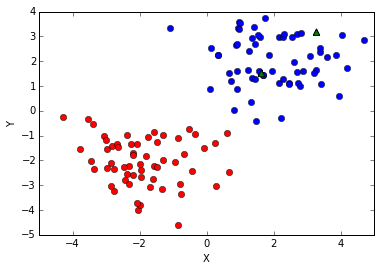

In [15]:
SVplot1 = plotsupportvector(sv_lin,X_lin,Y_lin)

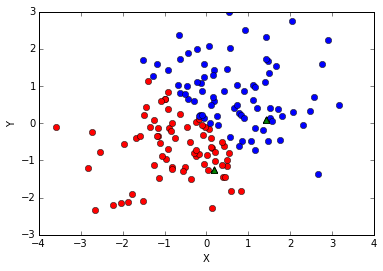

In [16]:
SVplot2 = plotsupportvector(sv_non,X_non,Y_non)